In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("insurance (1).csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


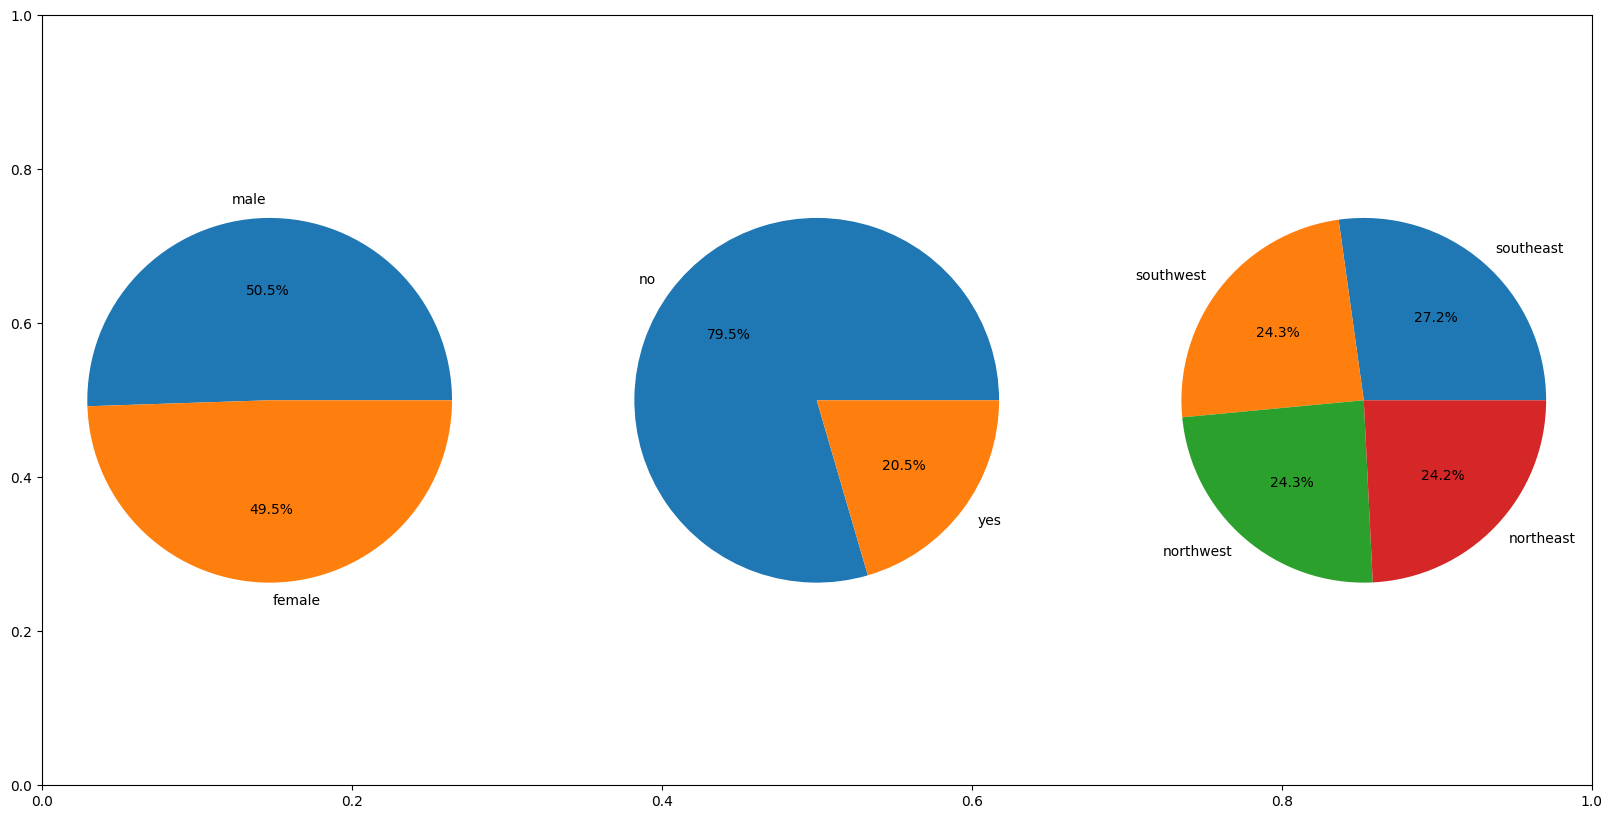

In [ ]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

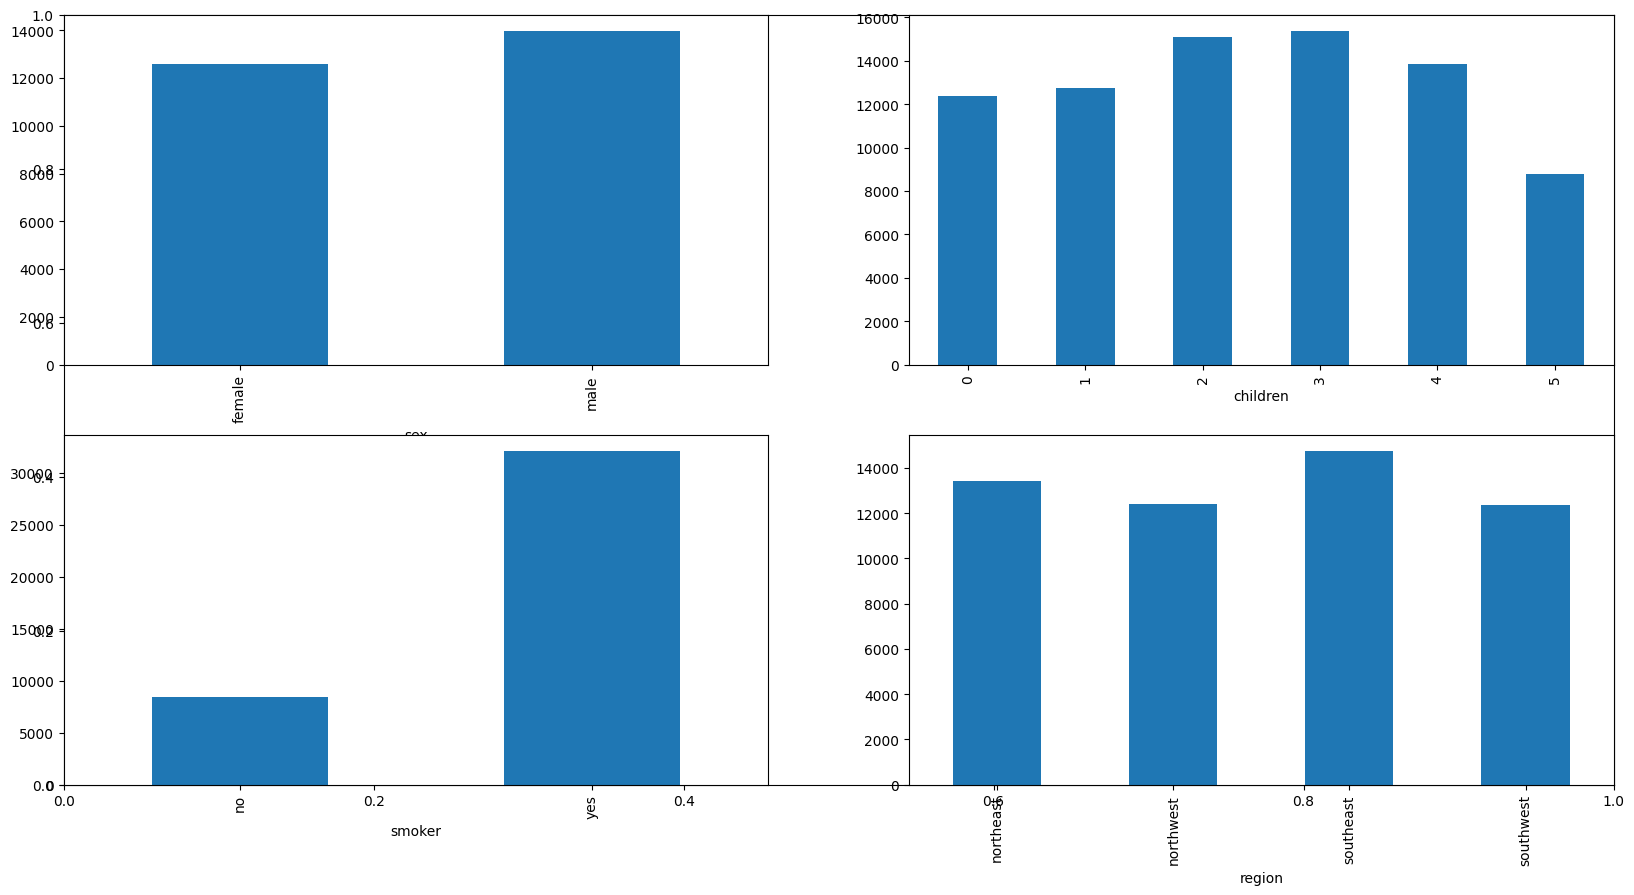

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

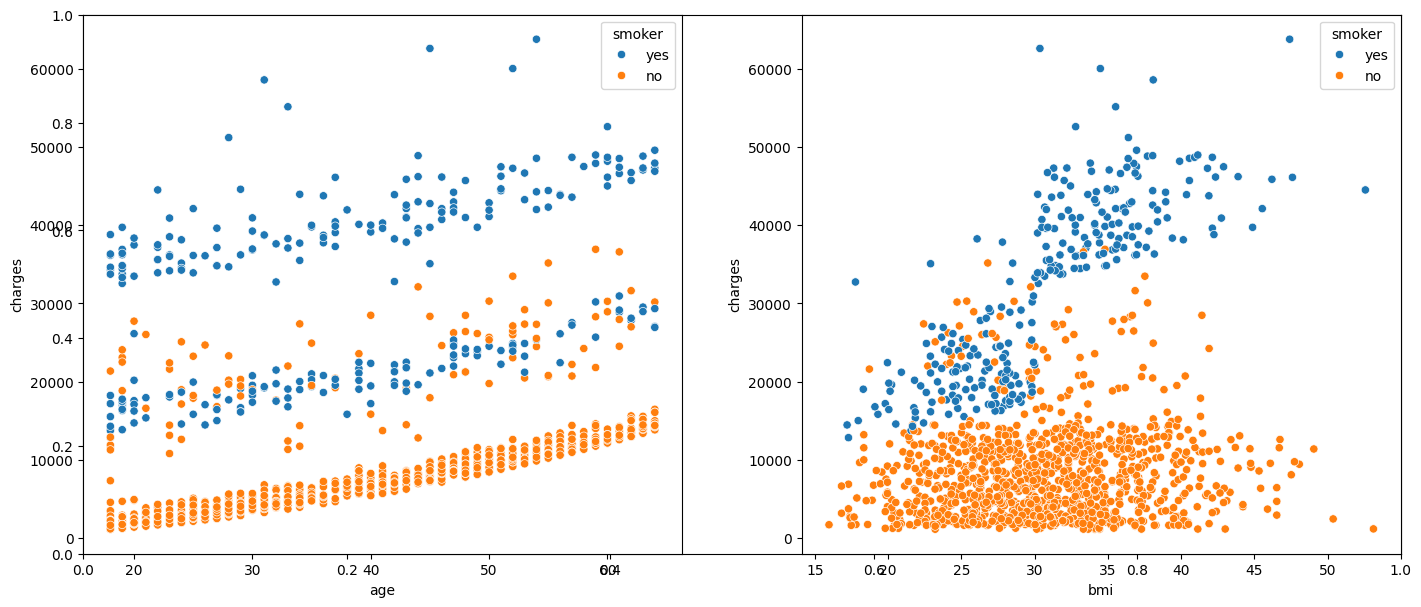

In [ ]:
import seaborn as sns
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,
				y='charges',
				hue='smoker')
plt.show()

<Axes: ylabel='age'>

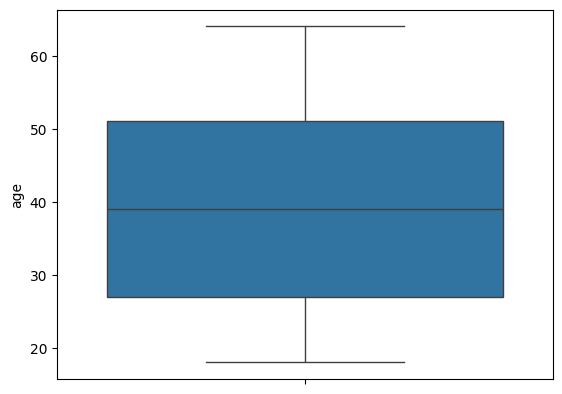

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

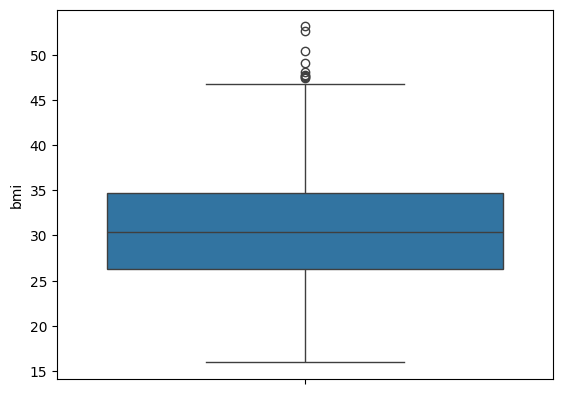

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:
# Calculate Q1 (25th percentile), Q2 (median), Q3 (75th percentile)
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)

# Compute the Interquartile Range (IQR)
iqr=Q3-Q1

# Calculate lower and upper limits for detecting outliers
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr

# Print the outlier thresholds
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


> Q1, Q2, Q3:

Q1: 25th percentile — value below which 25% of data lies.

Q2: 50th percentile — the median.

Q3: 75th percentile — value below which 75% of data lies.

> IQR Calculation:

IQR = Q3 - Q1 → this captures the middle 50% of the data.

> Outlier Thresholds:

Lower Limit = Q1 - 1.5 × IQR → values below this are potential lower outliers.

Upper Limit = Q3 + 1.5 × IQR → values above this are potential upper outliers.

Final Print:

You’re printing the thresholds, not the actual outliers — those thresholds can now be used to filter extreme values.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.8 MB/s eta 0:00:00


<Axes: ylabel='bmi'>

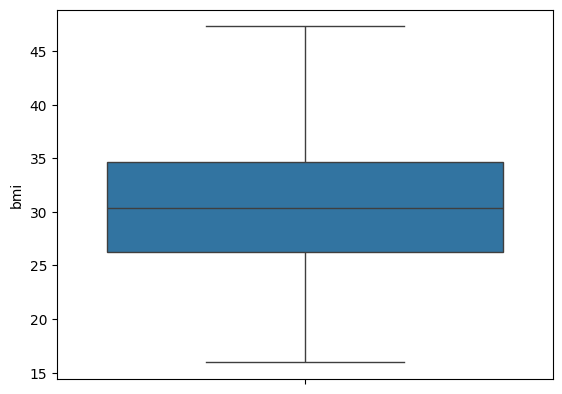

In [ ]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [ ]:
df['bmi'].skew()
df['age'].skew()

np.float64(0.054780773126998195)

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [ ]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

feature_columns = X.columns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


> Separating Input and Output

Dividing dataset into:

Features (X) — the things your model will learn from (like age, BMI, smoker, etc.).

Target (Y) — the thing your model will try to predict (here, the charges).

> Preparing for Training and Testing
Setting up data to:

Train the model on a portion of it.

Test how well it performs on unseen data.

This avoids overfitting and tells you if your model generalizes well.

> Preparing for Cross-Validation

Importing a method to evaluate model by:

Splitting the data into multiple parts (folds).

Training and testing the model on different parts repeatedly.

This gives a more reliable estimate of model performance compared to a single train-test split.



In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
import numpy as np

# Define a class to represent a node in the decision tree
class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None, gain=None):
        self.feature_index = feature_index # Index of the feature to split on
        self.threshold = threshold  # Threshold value for splitting
        self.left = left  # Left child node
        self.right = right  # right child node
        self.value = value  # Mean value at leaf
        self.gain = gain  #Gain from the current splt


class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=3, min_samples_split=2, min_child_weight=1, reg_lambda=1.0):
        self.max_depth = max_depth # Maximum depth of the tree
        self.min_samples_split = min_samples_split # Minimum samples required to split
        self.min_child_weight = min_child_weight  # Minimum hessian sum in a node to allow split
        self.reg_lambda = reg_lambda # L2 regularization term
        self.root = None # Root of the built tree

     # Entry point to train the tree
    def fit(self, X, gradient, hessian):
        self.root = self._build_tree(np.array(X), np.array(gradient), np.array(hessian), depth=0)

    # Recursive function to build the tree & Stopping criteria: max depth, minimum samples, or low hessian weight
    def _build_tree(self, X, g, h, depth):
        num_samples, num_features = X.shape
        if (depth >= self.max_depth) or (num_samples < self.min_samples_split) or (np.sum(h) < self.min_child_weight):
            value = -np.sum(g) / (np.sum(h) + self.reg_lambda)
            return TreeNode(value=value)

        # Try every feature and threshold to find the best split
        best_feature, best_threshold, best_gain = None, None, float('-inf')
        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                # Ensure child nodes have enough hessian (weight)
                if np.sum(h[left_mask]) < self.min_child_weight or np.sum(h[right_mask]) < self.min_child_weight:
                    continue

                gain = self._calculate_gain(g, h, left_mask, right_mask)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

         # If no good split found, create a leaf node
        if best_gain == float('-inf'):
            value = -np.sum(g) / (np.sum(h) + self.reg_lambda)
            return TreeNode(value=value)

        # Build left and right subtrees recursively
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], g[left_mask], h[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], g[right_mask], h[right_mask], depth + 1)
        return TreeNode(feature_index=best_feature, threshold=best_threshold,
                        left=left_subtree, right=right_subtree, gain=best_gain)

    # Gain calculation using gradient and hessian (from XGBoost logic)
    def _calculate_gain(self, g, h, left_mask, right_mask):
        G, H = np.sum(g), np.sum(h)
        G_L, H_L = np.sum(g[left_mask]), np.sum(h[left_mask])
        G_R, H_R = np.sum(g[right_mask]), np.sum(h[right_mask])

        def score(G, H):
            return (G ** 2) / (H + self.reg_lambda)

        gain = score(G_L, H_L) + score(G_R, H_R) - score(G, H)
        return gain

    # Predict for a batch of inputs
    def predict(self, X):
        return np.array([self._predict_sample(self.root, x) for x in X])

    # Predict for a single sample by traversing the tree
    def _predict_sample(self, node, x):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(node.left, x)
        else:
            return self._predict_sample(node.right, x)



> Tree Node Structure (TreeNode class)

Each tree node holds:

feature_index: the feature on which the split is made.

threshold: the value of the feature to split on.

left & right: child nodes.

value: prediction value at leaf (used if no further splitting is done).

gain: gain achieved from the split (useful for analysis/visualization).

> Tree Construction Setup (DecisionTreeRegressorCustom)

Parameters:

max_depth: max levels to go in the tree.

min_samples_split: stop splitting if node has fewer samples.

min_child_weight: stop if sum of hessians in a child is too low (regularization).

reg_lambda: L2 regularization term to control overfitting.


> Tree Building Logic (_build_tree)
Recursively builds the tree:

Stops if depth/samples/hessian limits are hit and calculates leaf value:

value
=
−
∑
𝑔
∑
ℎ
+
𝜆
value=−
∑h+λ
∑g
​

Else, tries all features and thresholds to find the best split with highest gain.

> Split Evaluation (_calculate_gain)
Gain formula follows XGBoost logic:

For left and right branches, calculates:

score
(
𝐺
,
𝐻
)
=
𝐺
2
𝐻
+
𝜆
score(G,H)=
H+λ
G
2

​
Total Gain:

Gain
=
score
𝐿
+
score
𝑅
−
score
𝑝
𝑎
𝑟
𝑒
𝑛
𝑡
Gain=score
L
​
 +score
R
​
 −score
parent
​

Split is only accepted if both sides have sufficient hessian sum (min_child_weight).

> Prediction (predict and _predict_sample)
Uses the trained tree to predict values:

For each sample, goes down the tree using feature_index and threshold.

Returns the value at the leaf node it lands in.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Custom simplified XGBoost-like regressor built from scratch
class MyXGBoostRegressor:
    def __init__(self, n_estimators=10, max_depth=3, gamma=0.0, learning_rate=0.1,
                 min_child_weight=1, reg_lambda=1.0):
        self.n_estimators = n_estimators # Number of boosting rounds (trees)
        self.max_depth = max_depth # Max depth of each regression tree
        self.gamma = gamma # Minimum loss reduction to allow a split (pruning control)
        self.learning_rate = learning_rate # Step size shrinkage (also called eta)
        self.min_child_weight = min_child_weight # Minimum hessian sum to create a child node
        self.reg_lambda = reg_lambda # L2 regularization term
        self.trees = [] # List to store trained trees
        self.train_loss = [] # Track MSE loss after each tree

    # Compute gradient and hessian for squared error loss
    def _gradients(self, y_true, y_pred):
        grad = y_pred - y_true
        hess = np.ones_like(grad)
        return grad, hess

    # Fit the model on training data using gradient boosting
    def fit(self, X, y):
        self.trees = []
        self.train_loss = []
        y_pred = np.zeros(len(y))

        for _ in range(self.n_estimators):
            grad, hess = self._gradients(y, y_pred)

            # Train a regression tree on gradients and hessians
            tree = DecisionTreeRegressorCustom(max_depth=self.max_depth,
                                               min_child_weight=self.min_child_weight,
                                               reg_lambda=self.reg_lambda)
            tree.fit(X, grad, hess)

            update = tree.predict(X)
            update = np.where(np.abs(update) > self.gamma, update, 0)

            y_pred += self.learning_rate * update
            self.train_loss.append(mean_squared_error(y, y_pred))

            self.trees.append(tree)

    # Predict output using the ensemble of all trees
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


> Initialization (__init__)
Stores all the hyperparameters:

n_estimators: number of boosting rounds (trees).

max_depth, min_child_weight, reg_lambda: for controlling each tree.

learning_rate: how much to add each new tree's prediction to the final result.

gamma: minimum gain threshold to keep a split.

Initializes:

self.trees: list to hold all trained trees.

self.train_loss: to track training loss after each boosting round.

> Gradient and Hessian Calculation (_gradients)

For squared error loss
𝐿
=
1/
2
(
𝑦
−
𝑦
)
^
2

Gradient:
(𝑦
^
−
𝑦)


Hessian: constant 1 for all points.

> Training (fit)
Initial prediction: starts with all-zero predictions (y_pred).

For each boosting round:

Calculate gradients & hessians.

Build a DecisionTreeRegressorCustom using them.

Predict the update from the new tree.

Apply gamma pruning:

Set updates with small absolute value (≤ gamma) to zero (avoid noisy updates).

Update final prediction:

𝑦
pred
+
=
𝜂
⋅
update
y
pred
​
 +=η⋅update
Compute and save training loss (MSE).

Save the trained tree.

> Prediction (predict)
Initializes with 0s again.

Adds each tree's predictions (scaled by learning rate) to get final predicted values.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the dataset into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert all data to NumPy arrays for consistency and performance
X = np.array(X)
Y = np.array(Y)
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain).ravel()
ytest = np.array(ytest).ravel()

# Initialize custom XGBoost model with specified hyperparameters
model = MyXGBoostRegressor(n_estimators=50, max_depth=5, gamma=0.1,
                           learning_rate=0.05, min_child_weight=5, reg_lambda=1.0)

# Train the model on training data & Predict on training and testing sets
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

# Evaluate the model performance using R² score
print("Train R²:", r2_score(ytrain, ypred_train))
print("Test R²:", r2_score(ytest, ypred_test))



Train R²: 0.8686336155361083
Test R²: 0.878384252141233


> Splitting the Data
Divide the dataset into two parts:

One to train your model.

One to test how well it generalizes to unseen data.

> Preparing the Data

Convert everything into proper numerical format so that your custom model can work without shape issues or type errors.

> Model Initialization

Configure own XGBoost-like regressor with parameters that:

Control how deep each tree grows.

Decide how many trees are used.

> Applied regularization to prevent overfitting.

Set a learning rate to gradually approach the solution.

> Model Training (Boosting)

Train multiple trees sequentially.

Each new tree tries to fix the mistakes made by the previous ones.

Used gradients (loss direction) and hessians (confidence) to make smart splits.

Trees are added only if they provide enough gain (based on gamma and child weight).

> Prediction
After training, you use the combined output of all trees to make predictions:

Each tree gives a small correction.

The final prediction is the sum of all such corrections.

> Evaluation

On training data to see how well it learned.

On testing data to see how well it generalizes.

You use R² score: closer to 1 means better fit.

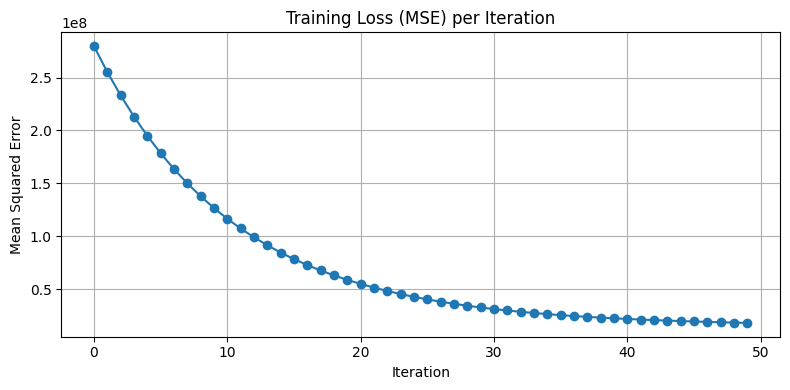

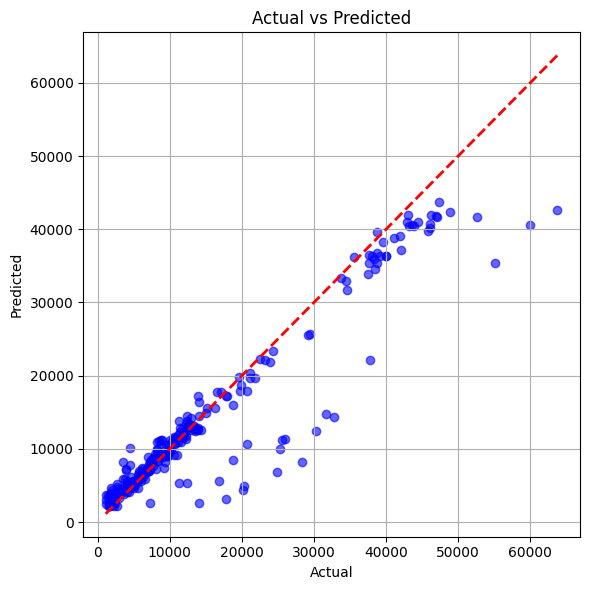

In [ ]:
# --- LOSS CURVE ---
plt.figure(figsize=(8, 4))
plt.plot(model.train_loss, marker='o')
plt.title("Training Loss (MSE) per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PREDICTED vs ACTUAL ---
plt.figure(figsize=(6, 6))
plt.scatter(ytest, ypred_test, color='blue', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


> Training Loss Curve

Tracking how the training loss (MSE) changes with each boosting iteration.

Each dot/point represents how well the model fits after adding a new tree.

The curve should ideally go downward, showing that the model is improving step-by-step.

> Actual vs Predicted Scatter Plot

Visualizing prediction accuracy on test data.

Each point is a sample:

X-axis = actual value

Y-axis = model’s predicted value

The red dashed line shows perfect predictions (i.e., where predicted = actual).

The closer your points are to this line, the better your model performed.




In [ ]:
# Save column names before converting to numpy
feature_columns = df.drop(['charges'], axis=1).columns

# Create DataFrame from xtest with original column names
xtest_df = pd.DataFrame(xtest, columns=feature_columns).reset_index(drop=True)

# Predictions and actuals
predicted_df = pd.DataFrame(ypred_test, columns=['predicted_charges']).reset_index(drop=True)
actual_df = pd.DataFrame(ytest, columns=['actual_charges']).reset_index(drop=True)

# Combine everything
result_df = pd.concat([xtest_df, predicted_df, actual_df], axis=1)

# View
print(result_df.head())



    age  sex     bmi  children  smoker  region  predicted_charges  \
0  49.0  0.0  22.515       0.0     0.0     1.0        8940.897170   
1  29.0  1.0  25.600       4.0     0.0     3.0        5724.392603   
2  51.0  1.0  36.385       3.0     0.0     0.0       12283.922900   
3  31.0  0.0  34.390       3.0     1.0     0.0       35412.671774   
4  31.0  0.0  38.390       2.0     0.0     2.0        4915.875232   

   actual_charges  
0      8688.85885  
1      5708.86700  
2     11436.73815  
3     38746.35510  
4      4463.20510  


In [ ]:
result_df

,age,sex,bmi,children,smoker,region,predicted_charges,actual_charges
0,49.0,0.0,22.515,0.0,0.0,1.0,8940.897170,8688.85885
1,29.0,1.0,25.600,4.0,0.0,3.0,5724.392603,5708.86700
2,51.0,1.0,36.385,3.0,0.0,0.0,12283.922900,11436.73815
3,31.0,0.0,34.390,3.0,1.0,0.0,35412.671774,38746.35510
4,31.0,0.0,38.390,2.0,0.0,2.0,4915.875232,4463.20510
...,...,...,...,...,...,...,...,...
263,64.0,0.0,40.480,0.0,0.0,2.0,12727.214430,13831.11520
264,63.0,1.0,36.300,0.0,0.0,2.0,12796.227464,13887.20400
265,22.0,1.0,34.580,2.0,0.0,1.0,7146.593645,3925.75820
266,61.0,0.0,36.300,1.0,1.0,3.0,43691.588453,47403.88000


In [ ]:
result_df.to_csv('predicted_vs_actual_charges.csv', index=False)

In [ ]:
# Load the CSV
df = pd.read_csv('predicted_vs_actual_charges_with_llm.csv')

# Calculate R² scores
r2_model = r2_score(df['actual_charges'], df['predicted_charges'])
r2_llm = r2_score(df['actual_charges'], df['llm_predicted_charges'])

print(f"R² Score - Your Model: {r2_model:.4f}")
print(f"R² Score - LLM Prediction: {r2_llm:.4f}")


R² Score - Your Model: 0.8784
R² Score - LLM Prediction: -0.1911


In [ ]:
# Comparison Table
comparison = df[['actual_charges', 'predicted_charges', 'llm_predicted_charges']]
comparison['model_error'] = abs(comparison['actual_charges'] - comparison['predicted_charges'])
comparison['llm_error'] = abs(comparison['actual_charges'] - comparison['llm_predicted_charges'])

print("\nTop 10 comparisons by absolute error:")
print(comparison.head(20))



Top 10 comparisons by absolute error:
    actual_charges  predicted_charges  llm_predicted_charges   model_error  \
0       8688.85885        8940.897170               14187.50    252.038320   
1       5708.86700        5724.392603                6648.50     15.525603   
2      11436.73815       12283.922900                8410.00    847.184750   
3      38746.35510       35412.671774                7595.25   3333.683326   
4       4463.20510        4915.875232                7784.00    452.670132   
5       9304.70190        9243.189323                7007.00     61.512577   
6      38511.62830       34539.145686                9492.00   3972.482614   
7       2150.46900        2730.231265                8727.00    579.762265   
8       7345.72660        8170.670204                9031.50    824.943604   
9      10264.44210       11083.228494               10492.00    818.786394   
10     13415.03810       13138.977991                6811.00    276.060109   
11     24393.62240       

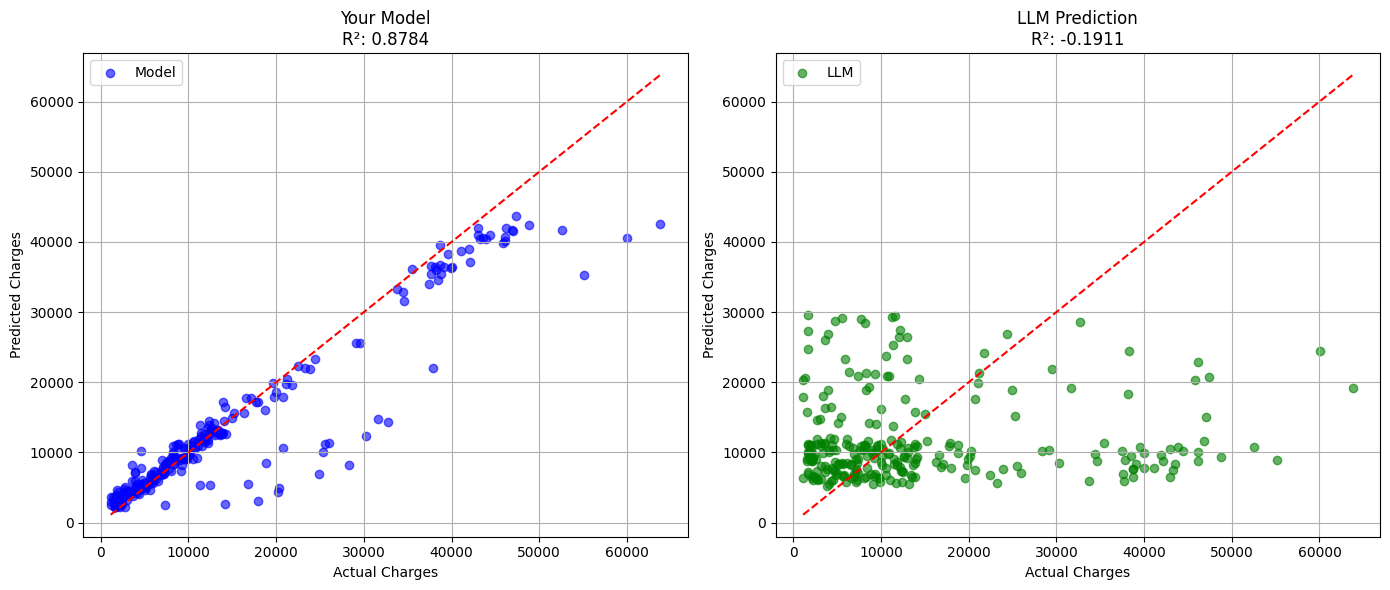

In [ ]:
# --- PLOT: Actual vs Model vs LLM ---
plt.figure(figsize=(14, 6))

# Model Prediction
plt.subplot(1, 2, 1)
plt.scatter(df['actual_charges'], df['predicted_charges'], alpha=0.6, color='blue', label='Model')
plt.plot([df['actual_charges'].min(), df['actual_charges'].max()],
         [df['actual_charges'].min(), df['actual_charges'].max()], 'r--')
plt.title(f"Your Model\nR²: {r2_model:.4f}")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.legend()

# LLM Prediction
plt.subplot(1, 2, 2)
plt.scatter(df['actual_charges'], df['llm_predicted_charges'], alpha=0.6, color='green', label='LLM')
plt.plot([df['actual_charges'].min(), df['actual_charges'].max()],
         [df['actual_charges'].min(), df['actual_charges'].max()], 'r--')
plt.title(f"LLM Prediction\nR²: {r2_llm:.4f}")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
